<a href="https://colab.research.google.com/github/aaguil8a/project-2-ML/blob/main/SecondIdeaAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer


import io
import urllib.request as req
import zipfile

# Part 1

## Dataset: 

**src:** https://www.kaggle.com/janiobachmann/math-students

**Description:** This is a dataset from the UCI datasets repository. This dataset contains the final scores of students at the end of a math programs with several features that might or might not impact the future outcome of these students.

**Target:** G3 (final grade numeric: from 0 to 20)

**Type:** Regression


# Features:


Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
filename = 'https://raw.githubusercontent.com/aaguil8a/DS/main/student-mat.csv'

df = pd.read_csv(filename)

In [5]:
df.shape

(395, 33)

# Cleaning & Exploring

In [9]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [13]:
df.duplicated().any() # No duplicates

False

In [12]:
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

# There are no missing values

Series([], dtype: float64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
for c in df.columns:
  print(f"Column: {c}\n")
  print(df[c].value_counts())
  print("---\n")

Column: school

GP    349
MS     46
Name: school, dtype: int64
---

Column: sex

F    208
M    187
Name: sex, dtype: int64
---

Column: age

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
---

Column: address

U    307
R     88
Name: address, dtype: int64
---

Column: famsize

GT3    281
LE3    114
Name: famsize, dtype: int64
---

Column: Pstatus

T    354
A     41
Name: Pstatus, dtype: int64
---

Column: Medu

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
---

Column: Fedu

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
---

Column: Mjob

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
---

Column: Fjob

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
---

Column: reason

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
-

### Overall the dataset looks clean--there are some outliers such as such as age and school, absences--let explore these outliers.

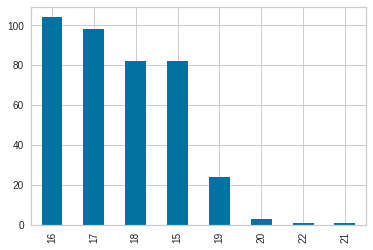

In [20]:
df.age.value_counts().plot(kind='bar') 
# We can see here there is right tail distribution: there is mostly teens that take part in this program. 


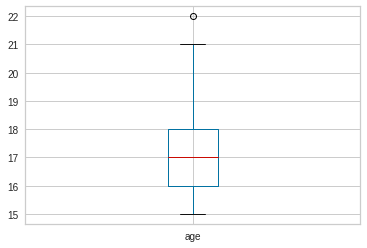

In [21]:
df.age.plot.box() # Here we see the outliers.

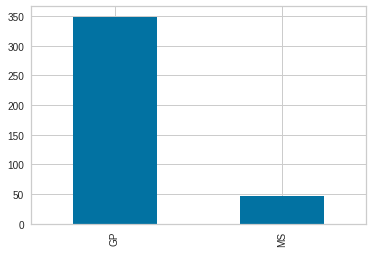

In [18]:
df.school.value_counts().plot(kind='bar') # For school we see that most GP school takes in the math program.

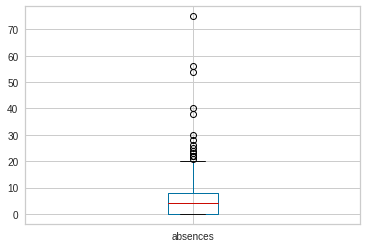

In [23]:
df.absences.plot.box() # Most of the outliers are absences that are more than 20. 

## Now that outliers have been identified--Ill move onto exploratory data viz.

### Categorical Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


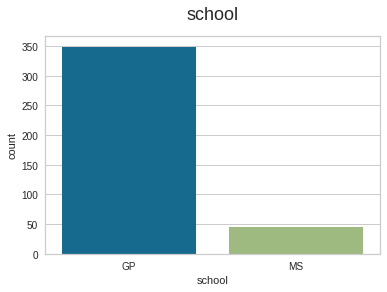

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


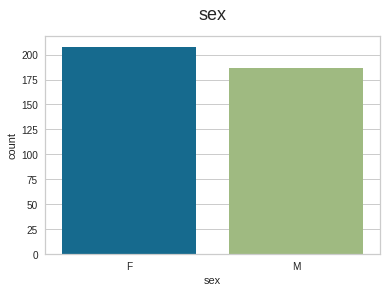

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


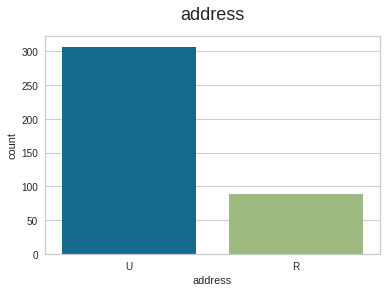

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


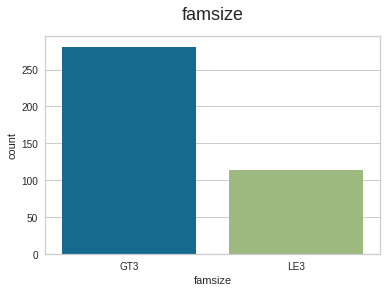

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


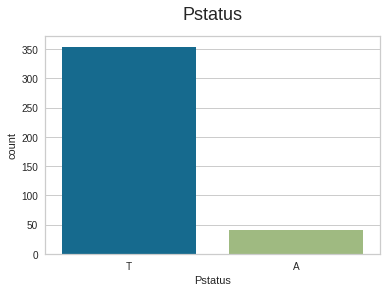

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


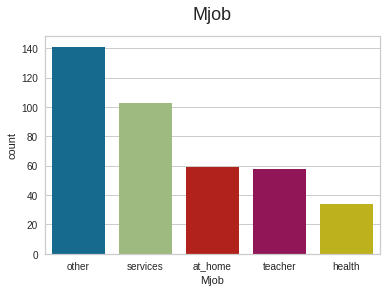

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


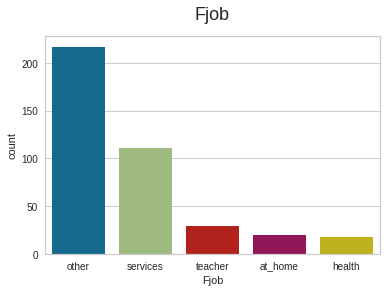

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


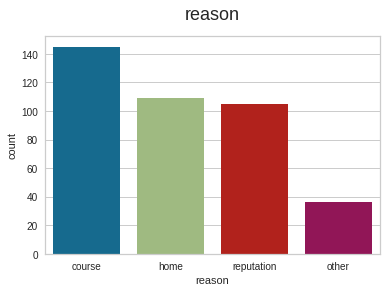

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


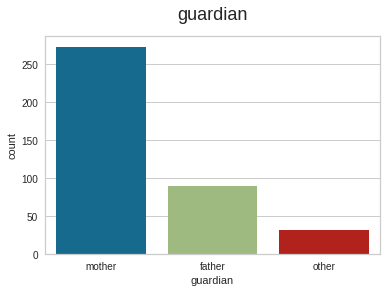

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


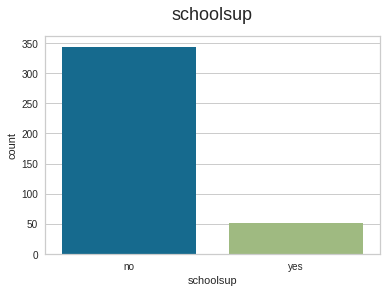

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


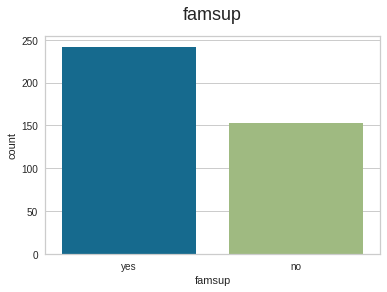

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


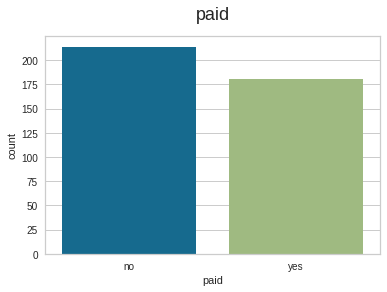

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


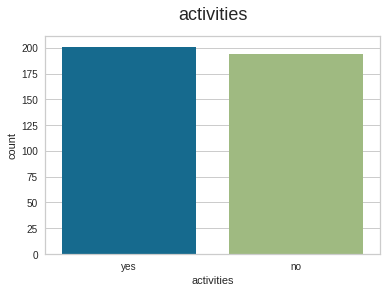

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


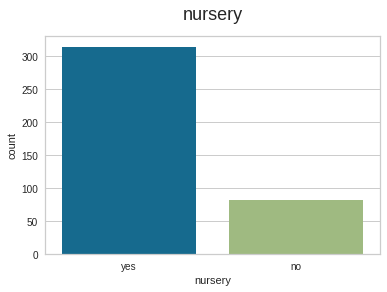

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


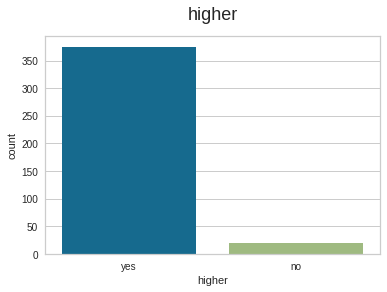

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


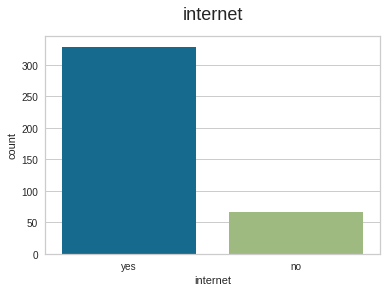

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


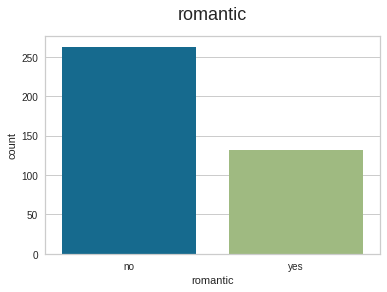

In [39]:
for c in categorical_cols:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  sns.countplot(df[c],order=df[c].value_counts().index)
  plt.show()

 # Numeric Data

In [41]:

numerical_cols = df.columns[df.dtypes == 'int64'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


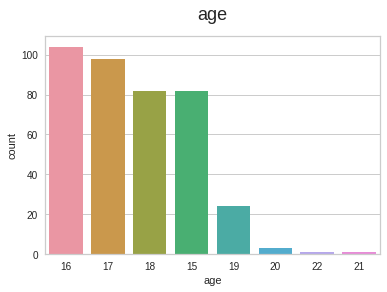

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


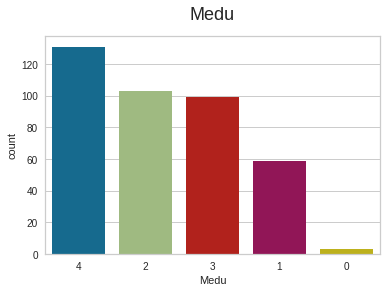

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


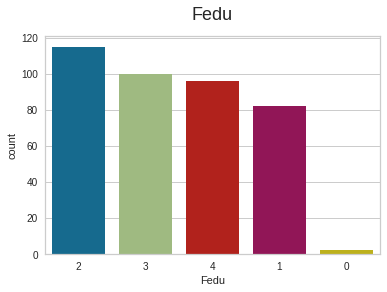

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


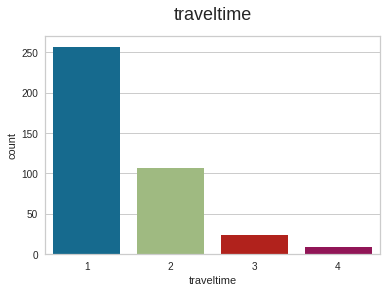

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


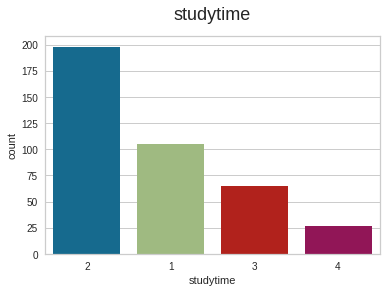

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


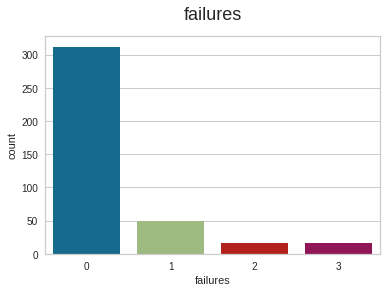

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


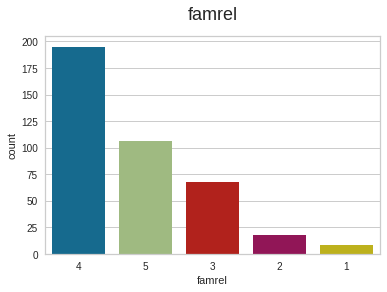

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


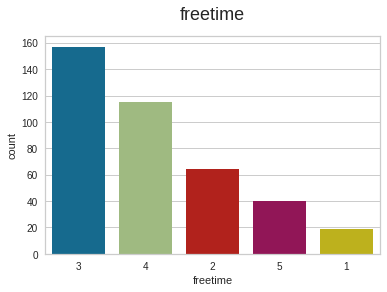

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


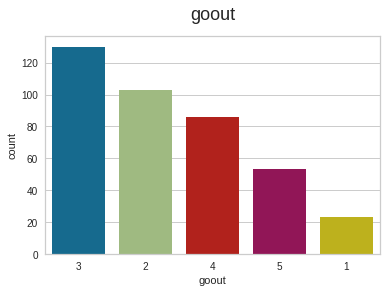

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


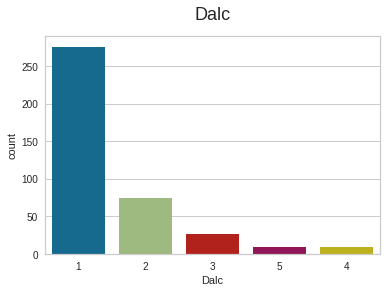

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


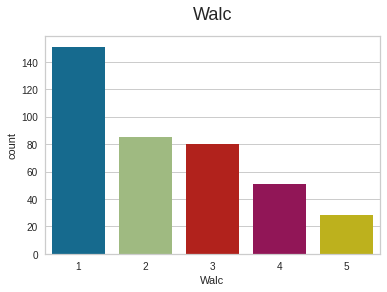

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


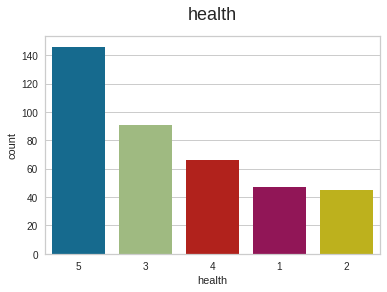

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


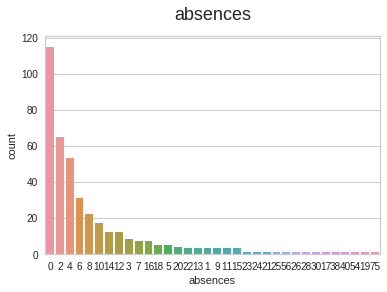

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


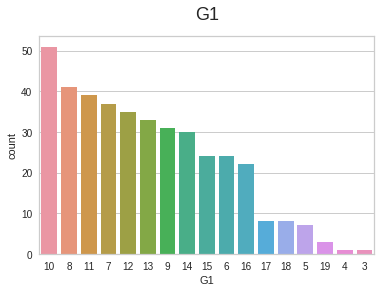

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


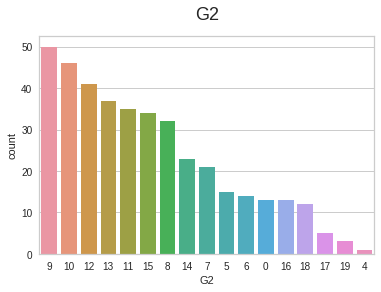

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


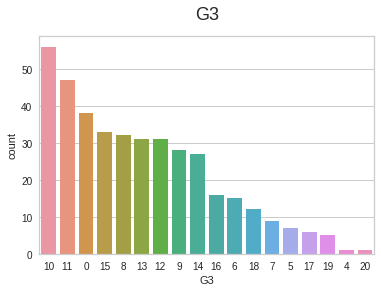

In [42]:
for c in numerical_cols:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  sns.countplot(df[c],order=df[c].value_counts().index)
  plt.show()

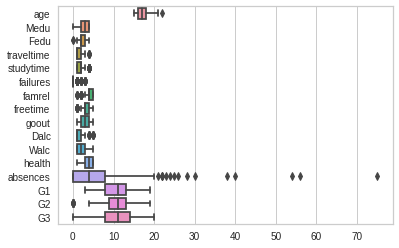

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,orient = "h");

In [22]:
(df
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


In [23]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


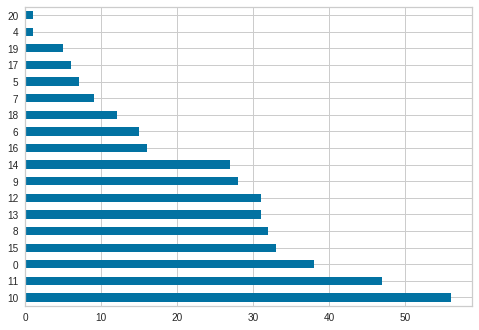

In [24]:
df.G3.value_counts().plot.barh()

In [25]:
df.G3.quantile(.99)

19.0

In [26]:
df.G3.quantile([.6, .8])

0.6    12.0
0.8    14.0
Name: G3, dtype: float64

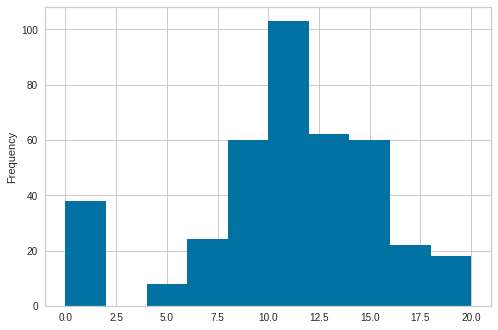

In [27]:
df.G3.plot.hist()

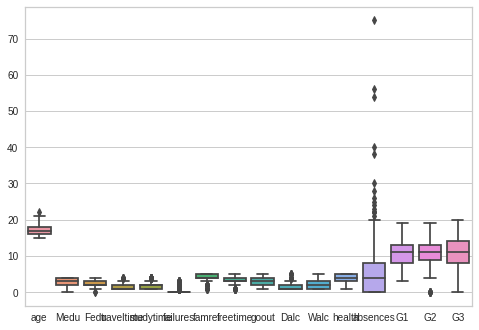

In [28]:
sns.boxplot(data=df)

In [29]:
df.G3.corr(df.absences)

0.03424731615006931

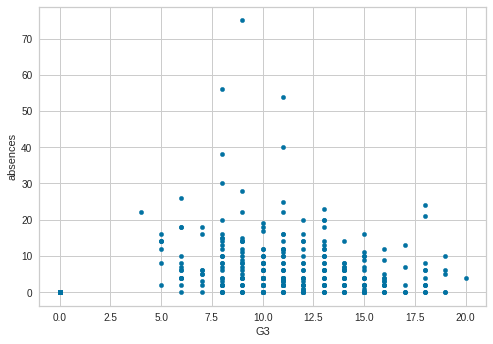

In [30]:
df.plot.scatter(x='G3', y='absences')

In [31]:
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
    
df = tweak_kag2(df)
df.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [32]:
df.isna().any()

age                  False
Medu                 False
Fedu                 False
traveltime           False
studytime            False
failures             False
famrel               False
freetime             False
goout                False
Dalc                 False
Walc                 False
health               False
absences             False
G1                   False
G2                   False
G3                   False
school_MS            False
sex_M                False
address_U            False
famsize_LE3          False
Pstatus_T            False
Mjob_health          False
Mjob_other           False
Mjob_services        False
Mjob_teacher         False
Fjob_health          False
Fjob_other           False
Fjob_services        False
Fjob_teacher         False
reason_home          False
reason_other         False
reason_reputation    False
guardian_mother      False
guardian_other       False
schoolsup_yes        False
famsup_yes           False
paid_yes             False
a

In [33]:
X = df
std = preprocessing.StandardScaler()
                        
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [34]:
# instance model
pca = decomposition.PCA()

# recoginize ehat embeddging are

pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,0.362968,-0.662011,-2.619059,-0.150514,-1.909049,1.195931,2.974020,-0.316236,2.800774,-0.828876,1.137751,-0.088371,-0.360996,3.042613,-1.072651,-1.742326,-0.237566,0.105362,-0.384918,0.694889,-0.304597,0.386173,-1.180852,-0.990967,-0.497876,-0.557965,-0.174638,-0.267643,-1.236639,-1.550694,0.286381,0.161630,0.152182,-0.717595,-0.778343,-0.574249,0.424692,0.119356,-0.868695,0.796581,-0.314136,-0.148982
1,2.272260,-2.353466,-0.486152,0.197988,0.124527,-1.114177,-0.036379,0.915729,-0.800651,0.684950,-0.200578,-0.522105,-0.896360,0.287153,-1.241850,0.163991,0.817678,0.390427,-0.616031,-1.122960,-1.226973,0.113658,-0.922485,-0.346324,-0.239496,0.419427,0.501354,0.403539,1.019542,-0.951689,0.133989,-0.982591,-0.596278,1.356727,-0.545692,-0.499628,-0.303147,0.575229,-0.717926,0.407654,-0.020569,-0.253189
2,2.134215,-0.595323,-0.546596,-0.383888,-0.625077,-1.435721,-0.671970,-2.887273,0.756880,0.794289,-0.233153,0.068709,-0.934967,0.804284,-0.892040,2.612661,0.312456,1.731918,-0.461272,1.263998,0.591671,-0.582788,-0.784594,0.334731,-1.602617,-1.231511,-2.505901,-0.650769,0.481157,1.868842,-0.580950,0.932726,-0.156257,0.890599,-0.738137,0.733610,1.081509,0.635221,-0.049695,0.477748,0.119776,-0.334841
3,-3.207328,-0.840273,-0.535223,1.618167,0.431047,-0.525111,0.209780,-1.433193,-1.580663,1.898388,-1.285340,-0.012730,0.511925,-1.934666,1.740690,-1.053627,-1.488457,-0.317349,0.124340,0.351880,0.423355,1.719085,-0.563055,0.056870,-0.021682,-0.824374,-0.430139,-0.273786,-0.460032,-0.146501,0.301392,0.680508,-0.210789,-0.412657,0.282420,0.106622,-0.882868,-0.093166,0.167804,0.065457,0.265401,-0.292328
4,0.436561,-2.080756,-0.533011,-0.794434,0.673129,-0.282411,1.556725,-0.077447,-0.682180,1.688506,1.149069,-1.156523,0.313518,0.159105,0.187414,-0.414550,0.757410,-0.835298,-0.109701,-0.286417,1.809560,-0.548655,-0.550425,0.211709,0.766150,0.236552,1.088149,0.123999,0.014738,0.310405,-0.962971,1.237310,-0.165245,0.572237,0.074861,-0.403721,0.111370,-0.379755,-0.792786,0.034590,-0.113765,0.150526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3.261966,4.063761,0.930748,2.941939,2.235787,0.400280,-0.669355,-0.256155,1.666233,-0.644260,1.781076,-2.837164,1.742632,2.628490,-1.321411,0.029899,1.089633,-0.221005,-0.393043,-0.501172,2.079853,1.311276,-0.135778,0.693989,0.635363,-0.972489,-0.187273,0.254871,-0.379221,-0.098258,1.021557,0.204790,-0.084737,0.312493,-1.246473,1.059604,-0.484825,-0.305729,0.006371,-0.266265,-0.075094,-0.091332
391,0.382804,3.842508,3.002182,0.421148,-0.852207,-0.442644,-1.079103,-1.866233,-0.479668,-0.320770,0.692363,0.672857,0.142909,0.191456,-2.363510,-0.952532,-0.908469,0.910703,0.640792,-0.976215,-1.941220,0.314993,0.528748,1.419197,-0.064629,0.428446,0.518722,0.200473,-0.339583,-0.430429,1.053460,0.524789,1.066785,-0.346702,0.130384,-0.120909,-1.173774,-0.336962,-0.038553,0.259895,-0.239689,-0.027686
392,5.957951,1.209704,3.406842,1.180817,1.098868,1.178373,0.543701,3.060241,0.805094,0.960671,0.592323,-1.081548,0.191925,1.253099,-1.530974,-0.761008,1.632395,0.764552,-0.505504,0.710912,0.609319,0.235384,0.636983,1.500171,0.277389,-1.145161,-1.379648,-0.954110,0.534127,0.908203,0.458465,-0.095131,-0.206776,-0.084069,-0.930966,-0.059588,-0.442740,0.122211,0.253351,-0.424192,-0.005453,-0.068126
393,1.925630,2.292021,2.787432,-0.967631,-1.941905,1.128726,-0.658579,-0.163055,0.332866,-0.040284,1.122767,-1.910235,0.304309,-1.100145,-0.421796,0.455530,-0.264927,0.565802,-1.133836,-1.863415,-2.147135,-0.663651,1.046516,1.069803,-0.385126,-0.954620,0.160830,-0.360490,0.591402,-0.757259,0.290084,0.779826,-0.896948,-1.071696,-0.106116,-0.178512,0.039619,-0.776078,-0.005953,0.123103,-0.423548,0.220632


In [35]:
pca.explained_variance_ratio_

array([0.09777103, 0.06322298, 0.05570385, 0.05053266, 0.04298473,
       0.04052156, 0.03850187, 0.03557148, 0.03440282, 0.03330945,
       0.0316871 , 0.03012454, 0.02839306, 0.0267983 , 0.02583115,
       0.02442318, 0.02387036, 0.02276883, 0.02231159, 0.02139721,
       0.01995302, 0.01903113, 0.01809381, 0.01782657, 0.01685674,
       0.01602041, 0.01536208, 0.0150761 , 0.01395535, 0.01277409,
       0.01220768, 0.01169586, 0.01109915, 0.00985239, 0.00914699,
       0.0076734 , 0.00743747, 0.00593721, 0.0036781 , 0.00267744,
       0.00188084, 0.00163642])

In [36]:
pca.components_[0]

array([ 0.20028442, -0.29216839, -0.25979943,  0.15681502, -0.13589621,
        0.28088584, -0.00809141,  0.04298861,  0.09430011,  0.1240115 ,
        0.14226682,  0.04565119,  0.02692621, -0.34202126, -0.35695893,
       -0.34540131,  0.13329656,  0.01580979, -0.12633195, -0.00696791,
        0.03572333, -0.12115595,  0.15503401, -0.04756045, -0.15948596,
       -0.10053458,  0.1119091 ,  0.00118272, -0.13402863,  0.01864949,
        0.01191914, -0.10147926, -0.05670954,  0.1273878 ,  0.00122038,
       -0.0943663 , -0.1268919 , -0.07941135, -0.1275729 , -0.18621161,
       -0.11898877,  0.05634136])

NameError: ignored

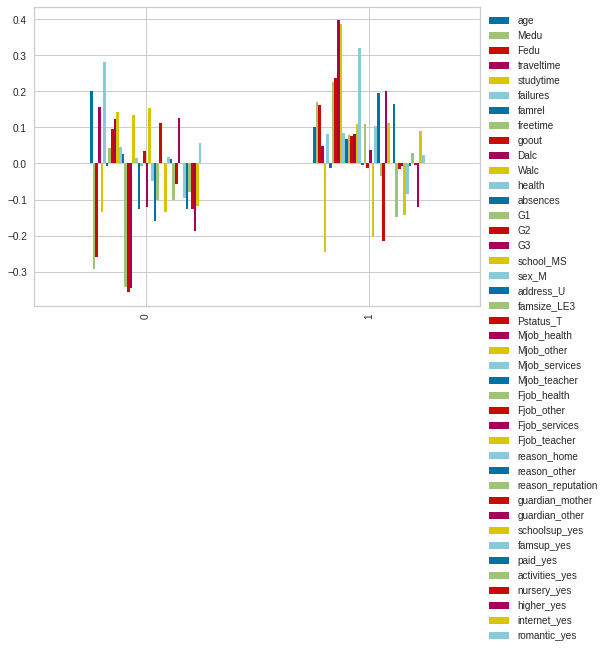

In [37]:
# What columns make up the components 1 & 2?
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Pstatus_t

In [ ]:
# What columns make up the components 3 & 4?
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[2:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Dalc

In [ ]:
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(health=X.health), 
                hue='health')

In [ ]:
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(age=X.age), 
                hue=)

In [ ]:

# Plot with Seaborn
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(Male=X.sex_M),
                hue='Male')

In [ ]:
sns.scatterplot(x='PC3', y='PC4', 
                data=pca_X.assign(Dalc=X.Dalc),
                hue='Dalc')

In [ ]:
sns.scatterplot(x='PC3', y='PC4', 
                data=pca_X.assign(Fedu=X.Fedu),
                hue='Fedu')

In [ ]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)
    
pd.Series(inerts).plot()


In [ ]:
start, end = 4, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [ ]:
k5 = cluster.KMeans(n_clusters=5, random_state=42)
k5.fit(X_std)
labels = k5.predict(X_std)

In [ ]:

X.assign(label=labels).iloc[:5,-3:]

In [ ]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

In [ ]:
# how many in each cluster?
pd.Series(labels).value_counts().sort_index()

In [ ]:
# Add coloring to aid impact to clusters
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

In [ ]:
# describe a column for each label
(X.assign(label=labels)
  .groupby('label')
  .G3
  .describe()
)

In [ ]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(label=labels),
                cmap='Pastel',
                hue='label', ax=ax)

In [ ]:
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show

def bokeh_scatter(
    x,
    y,
    data,
    hue=None,
    label_cols=None,
    size=None,
    legend=None,
    alpha=0.5,
):
    """
    x - x column name to plot
    y - y column name to plot
    data - pandas dataframe
    hue - column name to color by (numeric)
    legend - column name to label by
    label_cols - columns to use in tooltip (None all in dataframe)
    size - size of points in screen space unigs
    alpha - transparency
    """
    output_notebook()
    circle_kwargs = {}
    if legend:
        circle_kwargs["legend"] = legend
    if size:
        circle_kwargs["size"] = size
    if hue:
        color_seq = data[hue]
        mapper = models.LinearColorMapper(
            palette=palettes.viridis(256),
            low=min(color_seq),
            high=max(color_seq),
        )
        circle_kwargs[
            "fill_color"
        ] = transform.transform(hue, mapper)
    ds = models.ColumnDataSource(data)
    if label_cols is None:
        label_cols = data.columns
    tool_tips = sorted(
        [
            (x, "@{}".format(x))
            for x in label_cols
        ],
        key=lambda tup: tup[0],
    )
    hover = models.HoverTool(
        tooltips=tool_tips
    )
    fig = figure(
        tools=[
            hover,
            "pan",
            "zoom_in",
            "zoom_out",
            "reset",
        ],
        toolbar_location="below",
    )

    fig.circle(
        x,
        y,
        source=ds,
        alpha=alpha,
        **circle_kwargs
    )
    show(fig)
    return fig

res = bokeh_scatter("PC1","PC2", 
                    data=pd.concat([pca_X, X], axis=1).assign(label=labels), hue='label', size=10,
                    label_cols=list(X.columns)+['label'],
                   legend='label')

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(X, labels)

In [ ]:
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True):
    print(f'{col:20}{val:10.3f}')

In [ ]:
print(tree.export_text(dt, feature_names=list(X.columns)))